# Gold Recovery Analysis S10

This project aims to develop predictive models for gold recovery rates using a comprehensive dataset comprising training, test, and full feature sets. The analysis begins with thorough data preparation, including data verification and preprocessing, to ensure the accuracy of recovery calculations and identify any missing features. Subsequent data exploration focuses on understanding the concentration changes of key metals throughout the purification process, as well as assessing the feed particle size distributions. Finally, various regression models are trained and evaluated using symmetric Mean Absolute Percentage Error (sMAPE) as the primary metric, leading to the selection of the most effective model for predicting recovery outcomes.

## Prepare the data

### The files:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
#loding data from csv files
train_df = pd.read_csv('/datasets/gold_recovery_train.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
#creating function to check into data frames
def show(df):
    display(df.info())
    display(df.describe())

In [4]:
#intital look at train_df
show(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [5]:
#initial look at test_df
show(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [6]:
#initial look at the full_df
show(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [7]:
#displaying small portion of train_df
display(train_df.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
#checking for full line duplication
display(train_df.duplicated().sum())
display(test_df.duplicated().sum())
display(full_df.duplicated().sum())

0

0

0

In [9]:
#Chaning to datetime for all three data sets
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
full_df['date'] = pd.to_datetime(full_df['date'])

***Take Away:*** 
- The full data has 87 columns
- train data has 87 columns
- test data has 53 columns
- no full duplicated lines

### Check that recovery calculation

Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

***Recovery calc:***
Recovery = (rougher.output.concentrate_au * (rougher.input.feed_au - rougher.output.tail_au)) / (rougher.input.feed_au * (rougher.output.concentrate_au - rougher.output.tail_au)


- rougher.output.concentrate_au 
- rougher.output.tail_au 
- rougher.input.feed_au 

compare to :
- rougher.output.recovery 

In [10]:
#initial look at the data to do the calculations
display(train_df[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
                 'rougher.output.tail_au', 'rougher.output.recovery']].head())

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery
0,6.486150,19.793808,1.170244,87.107763
1,6.478583,20.050975,1.184827,86.843261
2,6.362222,19.737170,1.162562,86.842308
3,6.118189,19.320810,1.079755,87.226430
4,5.663707,19.216101,1.012642,86.688794


In [11]:
#Au recovery calculation
train_df['rougher.output.recovery_calc'] = (train_df['rougher.output.concentrate_au'] * 
                                            (train_df['rougher.input.feed_au'] - train_df['rougher.output.tail_au'])) / \
                                           (train_df['rougher.input.feed_au'] * 
                                            (train_df['rougher.output.concentrate_au'] - train_df['rougher.output.tail_au']))*100

In [12]:
#double checking the recover calc looks good
display(train_df[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
                 'rougher.output.tail_au', 'rougher.output.recovery','rougher.output.recovery_calc']].head())

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery,rougher.output.recovery_calc
0,6.486150,19.793808,1.170244,87.107763,87.107763
1,6.478583,20.050975,1.184827,86.843261,86.843261
2,6.362222,19.737170,1.162562,86.842308,86.842308
3,6.118189,19.320810,1.079755,87.226430,87.226430
4,5.663707,19.216101,1.012642,86.688794,86.688794


In [13]:
# Set tolerance values for comparison
tolerance = 1e-6  # Tolerance for precision up to 6 decimal places because that is the amount of decimal places the data has

# Checking where the calculated recovery value is close enough to the given value
recov_count_same = np.isclose(train_df['rougher.output.recovery'], train_df['rougher.output.recovery_calc'], atol=tolerance).sum()

# Counting how many rows have different recovery values
recov_count_diff = (~np.isclose(train_df['rougher.output.recovery'], train_df['rougher.output.recovery_calc'], atol=tolerance)).sum()

# Print the results
print("Number of rows where recovery values are the same:", recov_count_same)
print("Number of rows where recovery values are different:", recov_count_diff)

Number of rows where recovery values are the same: 14287
Number of rows where recovery values are different: 2573


In [14]:
# Mean absolute error (MAE) calc
mae_recovery = (abs((train_df['rougher.output.recovery'] - train_df['rougher.output.recovery_calc'])) / len(train_df['date'])).sum()

In [15]:
display(mae_recovery)

7.883623897364653e-15

In [16]:
#look at the average given reocevery value
avg_recovery = train_df['rougher.output.recovery'].mean()
print('The average given recovery concentration is:', avg_recovery)

The average given recovery concentration is: 82.39420120842001


In [17]:
#replacing all values that are zero with NaN
train_df['rougher.output.recovery'].replace(0, np.nan, inplace=True)

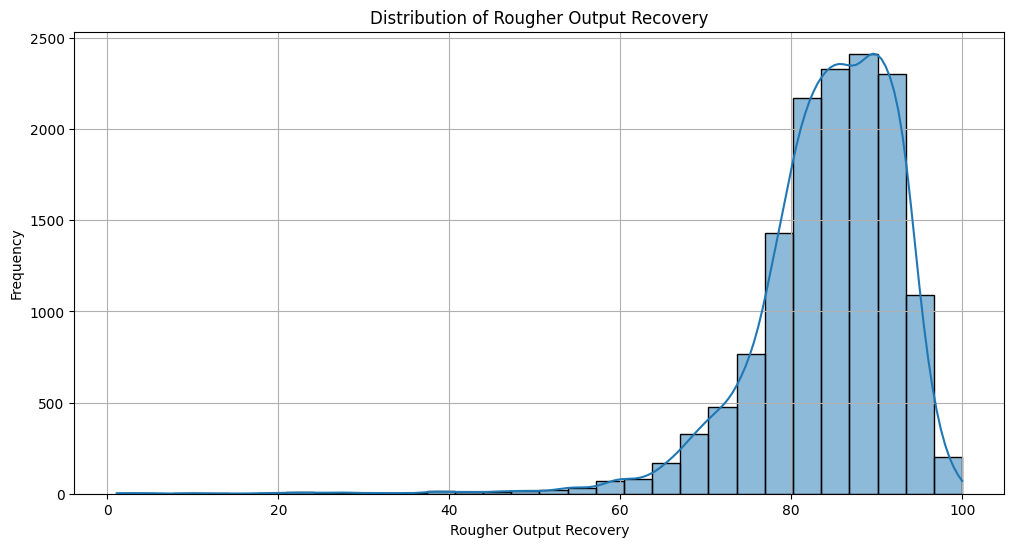

In [18]:
#plotting the given recovery values to see distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_df['rougher.output.recovery'], bins=30, kde=True)
plt.title('Distribution of Rougher Output Recovery')
plt.xlabel('Rougher Output Recovery')
plt.ylabel('Frequency')
plt.grid()
plt.show()

***Take Away:***
- based on the very small MAE the calculation of the recovery is very accurate compared to the given recovery value

### Analyzing Features
Analyze the features not available in the test set. What are these parameters? What is their type?

In [19]:
#finding the column names for train and test df
train_col = train_df.columns
test_col = test_df.columns

In [20]:
# Find common columns (intersection of train and test df)
common_train_test = [col for col in train_col if col in test_col]

# Find columns only in train_df
only_in_train = [col for col in train_col if col not in test_col]

# Find columns only in test_df
only_in_test= [col for col in test_col if col not in train_col]

# Find all different columns (symmetric difference)
different_columns = only_in_train + only_in_test


# Print the results

display("Columns in train_df and not in test_df:", only_in_train)
display("Columns in test_df and not in train_df:", only_in_test)

#intersect1d ????

'Columns in train_df and not in test_df:'

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

'Columns in test_df and not in train_df:'

[]

***Take aways:***
- As of now, there are quite a few columns that show up in the train data and not the test data. Keep this in mind for later calculations

## Analyze the data

### Changing concentration of (Au, Ag, Pb)
Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [21]:
# Replace zero values with NaN in specified columns
histogram_cols = [
    'rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb',
    'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb'
]
train_df[histogram_cols] = train_df[histogram_cols].replace(0, np.nan)

# Calculating mean values for each stage
au_pur1_in = train_df['rougher.output.concentrate_au'].mean()
ag_pur1_in = train_df['rougher.output.concentrate_ag'].mean()
pb_pur1_in = train_df['rougher.output.concentrate_pb'].mean()

au_pur1_out = train_df['primary_cleaner.output.concentrate_au'].mean()
ag_pur1_out = train_df['primary_cleaner.output.concentrate_ag'].mean()
pb_pur1_out = train_df['primary_cleaner.output.concentrate_pb'].mean()

au_pur2_out = train_df['final.output.concentrate_au'].mean()
ag_pur2_out = train_df['final.output.concentrate_ag'].mean()
pb_pur2_out = train_df['final.output.concentrate_pb'].mean()

print('1st Purification input mean concentration of Au:', au_pur1_in)
print('1st Purification input mean concentration of Ag:', ag_pur1_in)
print('1st Purification input mean concentration of Pb:', pb_pur1_in)

print('1st Purification output / 2nd Purification input mean concentration of Au:', au_pur1_out)
print('1st Purification output / 2nd Purification input mean concentration of Ag:', ag_pur1_out)
print('1st Purification output / 2nd Purification input mean concentration of Pb:', pb_pur1_out)

print('2nd purification output mean concentration of Au:', au_pur2_out)
print('2nd purification output mean concentration of Ag:', ag_pur2_out)
print('2nd purification output mean concentration of Pb:', pb_pur2_out)


1st Purification input mean concentration of Au: 19.101278858402132
1st Purification input mean concentration of Ag: 11.613948853652685
1st Purification input mean concentration of Pb: 7.55237455143873
1st Purification output / 2nd Purification input mean concentration of Au: 31.471802415917146
1st Purification output / 2nd Purification input mean concentration of Ag: 8.009843857732378
1st Purification output / 2nd Purification input mean concentration of Pb: 9.314568493716672
2nd purification output mean concentration of Au: 42.677773613558635
2nd purification output mean concentration of Ag: 5.100640247946094
2nd purification output mean concentration of Pb: 9.854971338141315


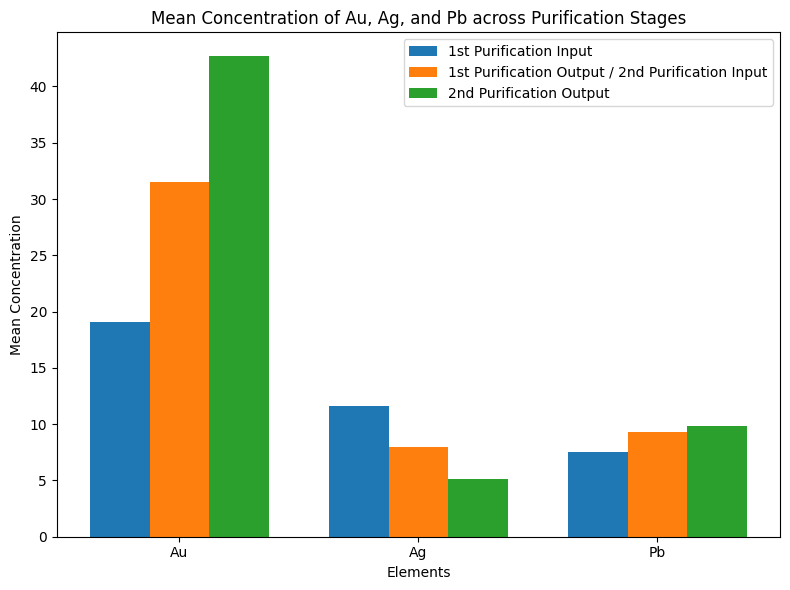

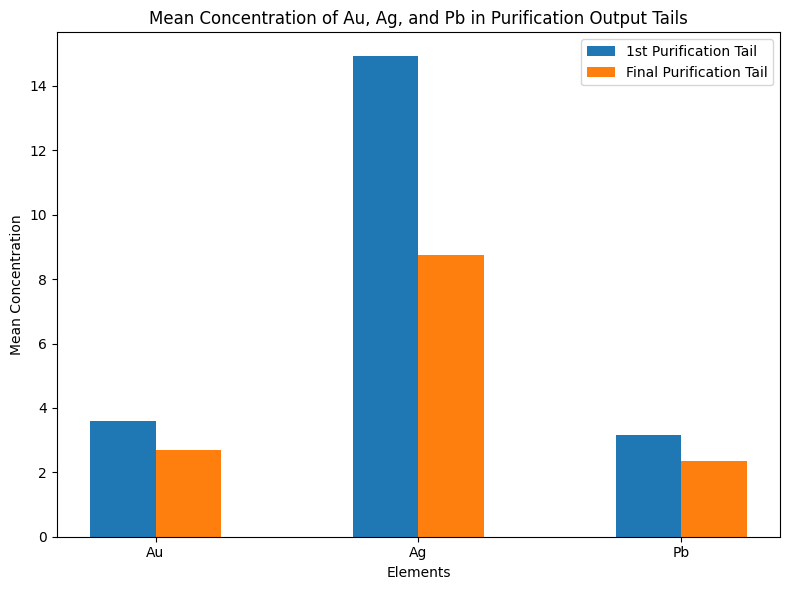

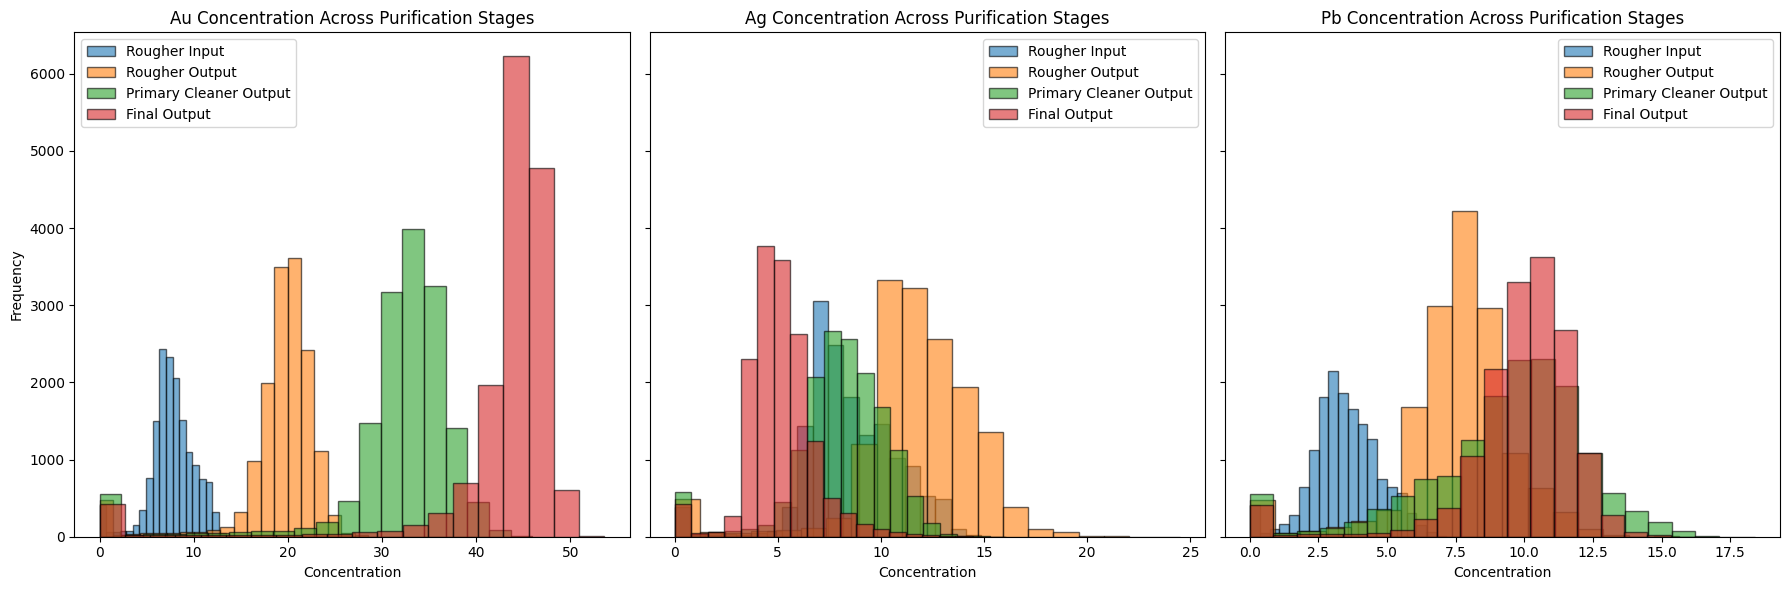

In [22]:
# Concentration tails
au_pur1_tail = train_df['primary_cleaner.output.tail_au'].mean()
ag_pur1_tail = train_df['primary_cleaner.output.tail_ag'].mean()
pb_pur1_tail = train_df['primary_cleaner.output.tail_pb'].mean()

au_pur2_tail = train_df['final.output.tail_au'].mean()
ag_pur2_tail = train_df['final.output.tail_ag'].mean()
pb_pur2_tail = train_df['final.output.tail_pb'].mean()

# Bar chart data
elements = ['Au', 'Ag', 'Pb']
x = np.arange(len(elements))

# Purification stages mean data
pur1_in = [au_pur1_in, ag_pur1_in, pb_pur1_in]
pur1_out = [au_pur1_out, ag_pur1_out, pb_pur1_out]
pur2_out = [au_pur2_out, ag_pur2_out, pb_pur2_out]
pur1_tail = [au_pur1_tail, ag_pur1_tail, pb_pur1_tail]
pur2_tail = [au_pur2_tail, ag_pur2_tail, pb_pur2_tail]

# Bar width
width = 0.25

# Plotting bar charts for purification stages
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width, pur1_in, width, label='1st Purification Input')
ax.bar(x, pur1_out, width, label='1st Purification Output / 2nd Purification Input')
ax.bar(x + width, pur2_out, width, label='2nd Purification Output')

# Adding labels and title
ax.set_xlabel('Elements')
ax.set_ylabel('Mean Concentration')
ax.set_title('Mean Concentration of Au, Ag, and Pb across Purification Stages')
ax.set_xticks(x)
ax.set_xticklabels(elements)
ax.legend()
plt.tight_layout()
plt.show()

# Plotting bar charts for purification tails
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, pur1_tail, width, label='1st Purification Tail')
ax.bar(x + width/2, pur2_tail, width, label='Final Purification Tail')

# Adding labels and title
ax.set_xlabel('Elements')
ax.set_ylabel('Mean Concentration')
ax.set_title('Mean Concentration of Au, Ag, and Pb in Purification Output Tails')
ax.set_xticks(x)
ax.set_xticklabels(elements)
ax.legend()
plt.tight_layout()
plt.show()

# Histogram plotting
stages = {
    'Rougher Input': ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb'],
    'Rougher Output': ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb'],
    'Primary Cleaner Output': ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb'],
    'Final Output': ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']
}

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, metal in enumerate(elements):
    for stage, cols in stages.items():
        axs[i].hist(train_df[cols[i]], bins=20, alpha=0.6, label=stage, edgecolor='black')
    axs[i].set_title(f'{metal} Concentration Across Purification Stages')
    axs[i].set_xlabel('Concentration')
    axs[i].legend()

axs[0].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

***Take Aways:***
- Over the 2 purification stages the concentration of Au increase from 17 to 39, which is what is desired.
- Interestingly, the concentration of Pb also increases over the purification processes from 6 to 9
- The concentration of Ag decreases from 10 to 4
- Looking at the tails there is a similar loss of Au and Pb over the cleaning processes and alomst 3 times as much loss of Ag

### Comparing feed Particle size
Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.


primary_cleaner.input.feed_size  
rougher.input.feed_size 

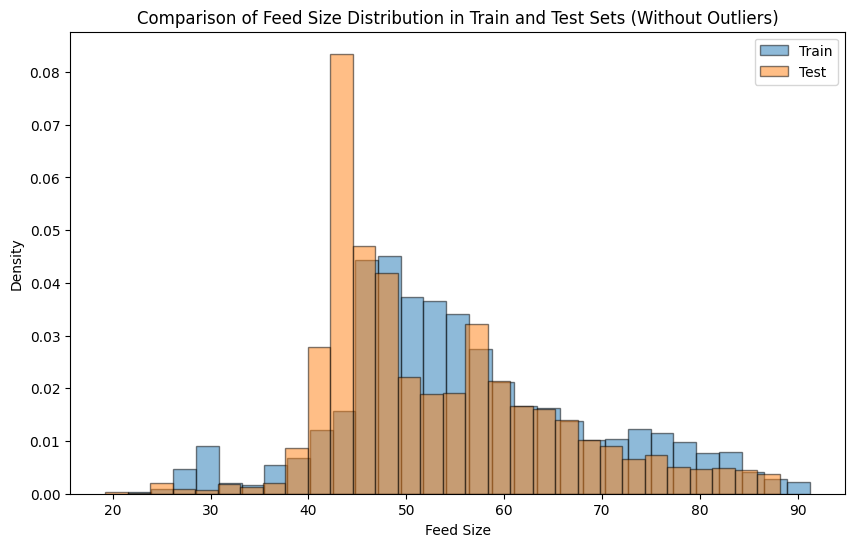

In [23]:
# Select the relevant feed size columns from the training and test sets
train_feed_size = train_df['rougher.input.feed_size']
test_feed_size = test_df['rougher.input.feed_size']

# Define a function to remove outliers based on the IQR
def remove_outliers(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers from train and test feed sizes
train_feed_size_no_outliers = remove_outliers(train_feed_size)
test_feed_size_no_outliers = remove_outliers(test_feed_size)

# Plotting normalized histograms without outliers
plt.figure(figsize=(10, 6))
plt.hist(train_feed_size_no_outliers, bins=30, alpha=0.5, label='Train', density=True, edgecolor='black')
plt.hist(test_feed_size_no_outliers, bins=30, alpha=0.5, label='Test', density=True, edgecolor='black')

# Adding labels and title
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.title('Comparison of Feed Size Distribution in Train and Test Sets (Without Outliers)')
plt.legend()
plt.show()


***Take Aways:***
- There are no significant differences in the size of particle between train and test data sets

### Total Concentrations at different stages
Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 



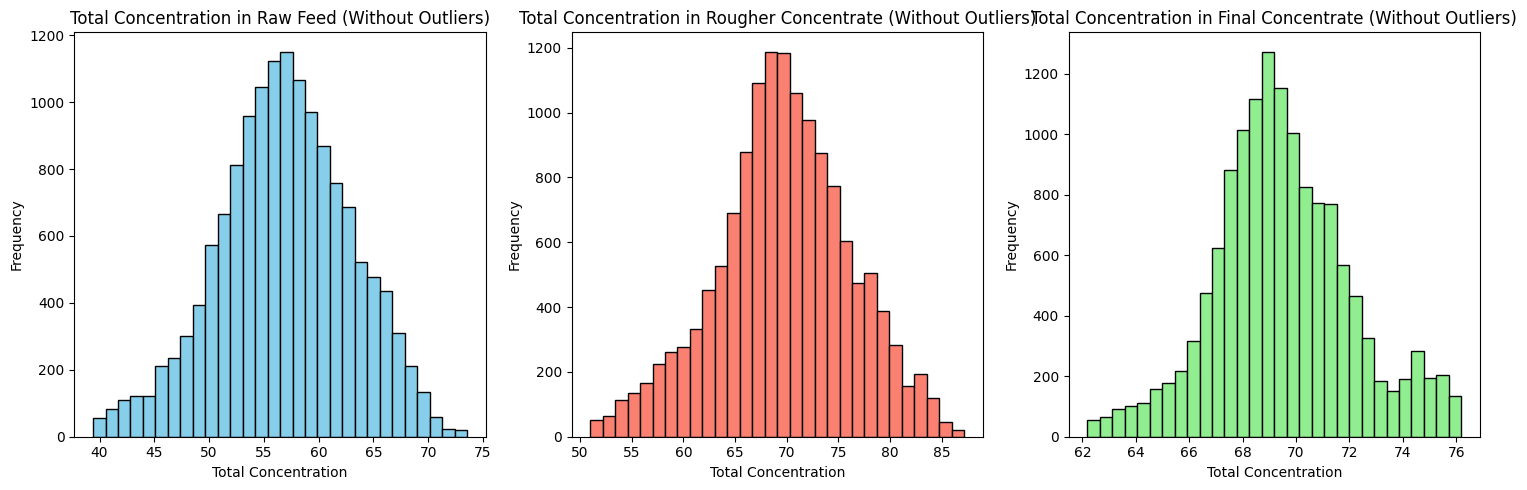

Number of rows with near-zero total concentration removed: 517


In [24]:
# Calculate total concentrations for each stage
train_df['total_raw_feed'] = (
    train_df['rougher.input.feed_ag'] + 
    train_df['rougher.input.feed_pb'] + 
    train_df['rougher.input.feed_sol'] + 
    train_df['rougher.input.feed_au']
)

train_df['total_rougher_concentrate'] = (
    train_df['rougher.output.concentrate_ag'] + 
    train_df['rougher.output.concentrate_pb'] + 
    train_df['rougher.output.concentrate_sol'] + 
    train_df['rougher.output.concentrate_au']
)

train_df['total_final_concentrate'] = (
    train_df['final.output.concentrate_ag'] + 
    train_df['final.output.concentrate_pb'] + 
    train_df['final.output.concentrate_sol'] + 
    train_df['final.output.concentrate_au']
)

# Remove outliers for each total concentration column
cleaned_raw_feed = remove_outliers(train_df['total_raw_feed'])
cleaned_rougher_concentrate = remove_outliers(train_df['total_rougher_concentrate'])
cleaned_final_concentrate = remove_outliers(train_df['total_final_concentrate'])

#  Plot histograms of total concentrations at each stage without outliers
plt.figure(figsize=(15, 5))

# Raw feed
plt.subplot(1, 3, 1)
plt.hist(cleaned_raw_feed, bins=30, color='skyblue', edgecolor='black')
plt.title('Total Concentration in Raw Feed (Without Outliers)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')

# Rougher concentrate
plt.subplot(1, 3, 2)
plt.hist(cleaned_rougher_concentrate, bins=30, color='salmon', edgecolor='black')
plt.title('Total Concentration in Rougher Concentrate (Without Outliers)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')

# Final concentrate
plt.subplot(1, 3, 3)
plt.hist(cleaned_final_concentrate, bins=30, color='lightgreen', edgecolor='black')
plt.title('Total Concentration in Final Concentrate (Without Outliers)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Identify and remove rows with near-zero total concentration
# Define a threshold for near-zero concentration (e.g., < 1)
threshold = 1

# Find indices where total concentration is near-zero in any of the stages
anomalies = train_df[
    (train_df['total_raw_feed'] < threshold) |
    (train_df['total_rougher_concentrate'] < threshold) |
    (train_df['total_final_concentrate'] < threshold)
]

# Remove anomalies from the dataset
train_df_cleaned = train_df.drop(anomalies.index)

# Display the number of anomalies detected and removed
print(f"Number of rows with near-zero total concentration removed: {len(anomalies)}")


In [25]:
elements = ['ag', 'pb', 'sol', 'au']

# Rougher input mean
rougher_input_means = {
    element: train_df[f'rougher.input.feed_{element}'].mean() for element in elements
}

# Rougher output mean
rougher_output_means = {
    element: train_df[f'rougher.output.concentrate_{element}'].mean() for element in elements
}

# Primary cleaner output mean
primary_output_means = {
    element: train_df[f'primary_cleaner.output.concentrate_{element}'].mean() for element in elements
}

# Final output mean
final_output_means = {
    element: train_df[f'final.output.concentrate_{element}'].mean() for element in elements
}

print("Rougher Input Means:", rougher_input_means)
print("Rougher Output Means:", rougher_output_means)
print("Primary Cleaner Output Means:", primary_output_means)
print("Final Output Means:", final_output_means)

Rougher Input Means: {'ag': 8.413542414401645, 'pb': 3.4600434960195425, 'sol': 32.636662392287306, 'au': 7.702850613452153}
Rougher Output Means: {'ag': 11.613948853652685, 'pb': 7.55237455143873, 'sol': 25.388996275311445, 'au': 19.101278858402132}
Primary Cleaner Output Means: {'ag': 8.009843857732378, 'pb': 9.314568493716672, 'sol': 9.171452795054778, 'au': 31.471802415917146}
Final Output Means: {'ag': 5.100640247946094, 'pb': 9.854971338141315, 'sol': 8.301122556927401, 'au': 42.677773613558635}


In [26]:
def calculate_percentage_change(start, end):
    return ((end - start) / start) * 100

# Calculate percentage changes for each element across three stages
percentage_changes = {
    element: {
        'rougher_in_to_rougher_out': calculate_percentage_change(rougher_input_means[element], rougher_output_means[element]),
        'primary_in_to_primary_out': calculate_percentage_change(rougher_output_means[element], primary_output_means[element]),
        'secondary_in_to_final_out': calculate_percentage_change(primary_output_means[element], final_output_means[element])
    } for element in elements
}

print("Percentage Changes in Concentration for Each Element:")
print(percentage_changes)

Percentage Changes in Concentration for Each Element:
{'ag': {'rougher_in_to_rougher_out': 38.03875088063779, 'primary_in_to_primary_out': -31.03255439933151, 'secondary_in_to_final_out': -36.320353573158066}, 'pb': {'rougher_in_to_rougher_out': 118.27397719499864, 'primary_in_to_primary_out': 23.332978658245228, 'secondary_in_to_final_out': 5.801694891064272}, 'sol': {'rougher_in_to_rougher_out': -22.207130220180325, 'primary_in_to_primary_out': -63.87626869687162, 'secondary_in_to_final_out': -9.489556971788113}, 'au': {'rougher_in_to_rougher_out': 147.9767532430646, 'primary_in_to_primary_out': 64.76280279041923, 'secondary_in_to_final_out': 35.60638520014973}}


In [27]:
# Elements and stages
elements = ['ag', 'pb', 'sol', 'au']
stages = ['Rougher Input', 'Rougher Output', 'Primary Output', 'Final Output']

# Concentrations for each element at each stage
concentration_means = {
    'ag': [
        rougher_input_means['ag'], rougher_output_means['ag'], primary_output_means['ag'], final_output_means['ag']
    ],
    'pb': [
        rougher_input_means['pb'], rougher_output_means['pb'], primary_output_means['pb'], final_output_means['pb']
    ],
    'sol': [
        rougher_input_means['sol'], rougher_output_means['sol'], primary_output_means['sol'], final_output_means['sol']
    ],
    'au': [
        rougher_input_means['au'], rougher_output_means['au'], primary_output_means['au'], final_output_means['au']
    ]
}

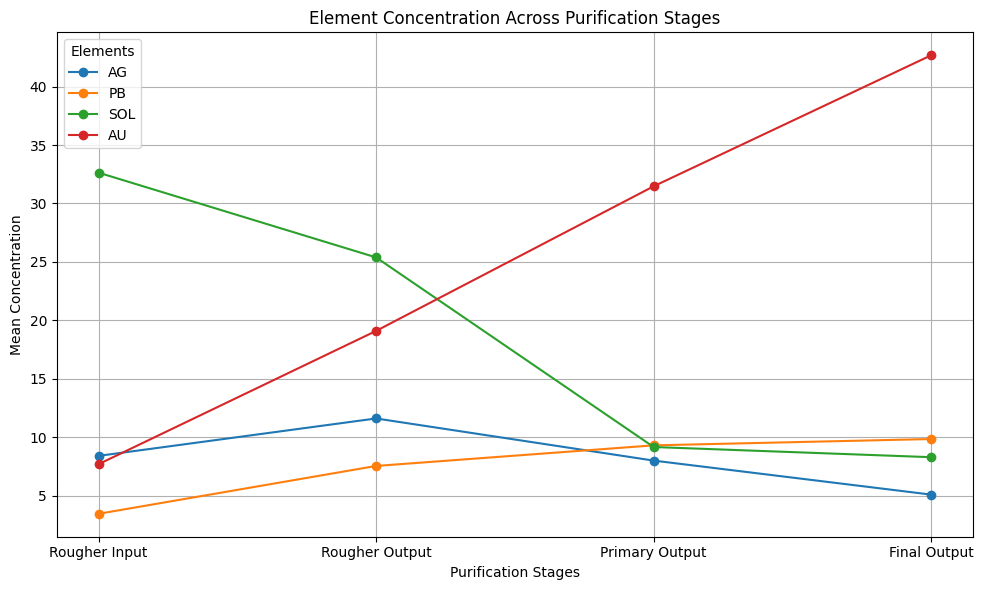

In [28]:
# Create a plot for concentration changes
plt.figure(figsize=(10, 6))

# Plot lines for each element
for element in elements:
    plt.plot(stages, concentration_means[element], marker='o', label=element.upper())

# Set labels and title
plt.xlabel('Purification Stages')
plt.ylabel('Mean Concentration')
plt.title('Element Concentration Across Purification Stages')
plt.legend(title='Elements')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

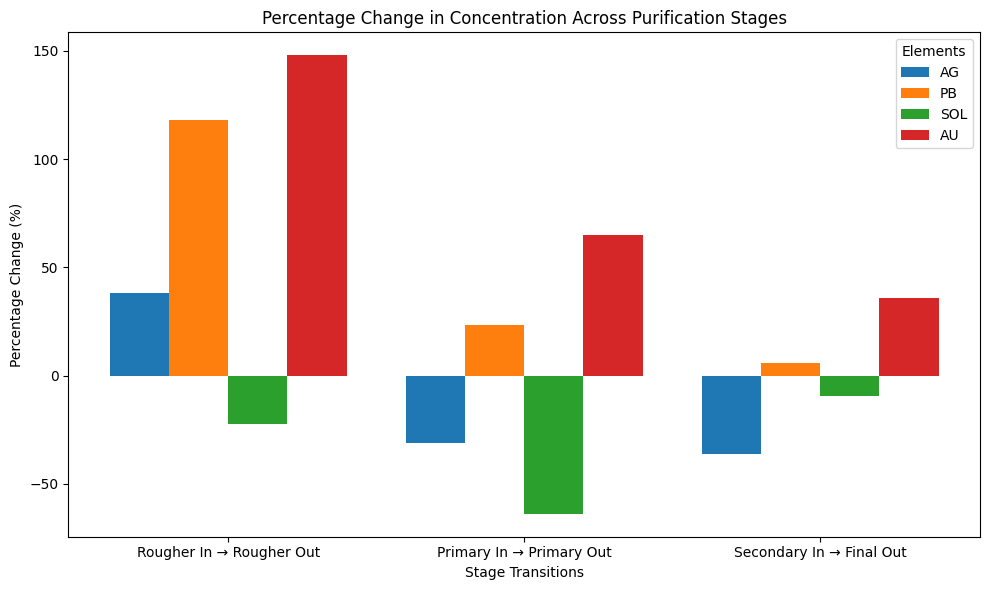

In [29]:
# Data for plotting
stages = ['Rougher In → Rougher Out', 'Primary In → Primary Out', 'Secondary In → Final Out']
elements = ['ag', 'pb', 'sol', 'au']

# Create a plot for percentage changes
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
width = 0.2

# Define x positions for each bar group
x = np.arange(len(stages))

# Plot bars for each element
for i, element in enumerate(elements):
    changes = [
        percentage_changes[element]['rougher_in_to_rougher_out'],
        percentage_changes[element]['primary_in_to_primary_out'],
        percentage_changes[element]['secondary_in_to_final_out']
    ]
    ax.bar(x + i*width, changes, width, label=element.upper())

# Set labels and title
ax.set_xlabel('Stage Transitions')
ax.set_ylabel('Percentage Change (%)')
ax.set_title('Percentage Change in Concentration Across Purification Stages')
ax.set_xticks(x + width * (len(elements) - 1) / 2)
ax.set_xticklabels(stages)
ax.legend(title='Elements')

# Show the plot
plt.tight_layout()
plt.show()

***Take Aways:***
- It looks like there could be an error with the input concetration of Ag
- The primary cleaning has a more significant effect on the concetration of Pb and Sol than the secondary cleaning

## Model Building

In [30]:
train_df.replace([np.inf,-np.inf], np.nan, inplace=True)
test_df.replace([np.inf,-np.inf], np.nan, inplace=True)
full_df.replace([np.inf,-np.inf], np.nan, inplace=True)

#filling data NaN values with previous values
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)
full_df.fillna(method='ffill', inplace=True)

### sMAPE value
Write a function to calculate the final sMAPE value.

In [31]:
'''def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return (200 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))).mean(axis=0)'''

'def smape(y_true, y_pred):\n    y_true = np.array(y_true)\n    y_pred = np.array(y_pred)\n    return (200 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))).mean(axis=0)'

### Training different Models
using sMAPE and final sMAPE functions

In [32]:
# Define sMAPE function
def smape(y_true, y_pred):
    return (200 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))).mean()

# Define weighted sMAPE function
def weighted_smape(y_true, y_pred):
    smape_rougher = smape(y_true[:, 0], y_pred[:, 0])  # Rougher output
    smape_final = smape(y_true[:, 1], y_pred[:, 1])    # Final output
    return 0.25 * smape_rougher + 0.75 * smape_final

# Make scorer for weighted sMAPE
weighted_smape_scorer = make_scorer(weighted_smape, greater_is_better=False)

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
}

# Define target and features
target = ['rougher.output.recovery', 'final.output.recovery']
features = list(set(train_df.columns).intersection(set(test_df.columns)).difference(set(target)))
features.remove('date')  # Remove 'date' column if present

# Merge target variables with the test dataset
test_df = test_df.merge(full_df[['final.output.recovery', 'rougher.output.recovery']], how='left', left_index=True, right_index=True)
train_df = train_df.dropna(subset=target)
test_df = test_df.dropna(subset=target)

# Prepare feature and target arrays
features_train, features_test = train_df[features].values, test_df[features].values
target_train, target_test = train_df[target].values, test_df[target].values

# Initialize dictionaries to store scores
weighted_smape_scores = {}

# Cross-validate each model
for model_name, model in models.items():
    # Cross-validation predictions for both targets
    y_pred_cv = cross_val_predict(model, features_train, target_train, cv=3, n_jobs=-1)
    
    # Calculate weighted sMAPE for cross-validated predictions
    score = weighted_smape(target_train, y_pred_cv)
    weighted_smape_scores[model_name] = score
    print(f"{model_name}: Cross-validated Weighted sMAPE = {score:.2f}")

# Sanity check with DummyRegressor (constant model)
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(features_train, target_train)
dummy_preds = dummy_model.predict(features_test)

# Calculate weighted sMAPE for constant model
weighted_smape_constant = weighted_smape(target_test, dummy_preds)
print(f"Constant Model (Dummy Regressor): Weighted sMAPE = {weighted_smape_constant:.2f}")

# Select the best model based on Weighted sMAPE
best_model_name = min(weighted_smape_scores, key=weighted_smape_scores.get)
best_model = models[best_model_name]
best_model.fit(features_train, target_train)

# Evaluate on test data
y_pred_test = best_model.predict(features_test)
final_test_smape = weighted_smape(target_test, y_pred_test)
print(f"Best Model on Test Data: Weighted sMAPE = {final_test_smape:.2f}")


Linear Regression: Cross-validated Weighted sMAPE = 16.54
Random Forest: Cross-validated Weighted sMAPE = 15.15
Constant Model (Dummy Regressor): Weighted sMAPE = 13.40
Best Model on Test Data: Weighted sMAPE = 16.70


## Conclusion:

This project focused on developing and evaluating predictive models to forecast recovery rates in a mineral purification process, specifically targeting both rougher and final outputs. It explored various regression techniques, including Linear Regression, Decision Trees, and Random Forests, using symmetric Mean Absolute Percentage Error (sMAPE) as the main evaluation metric.

By implementing thorough cross-validation and addressing challenges such as missing values and outliers, it ensured that the models performed reliably. Among the models evaluated, the Random Forest Regressor stood out as the top performer, achieving a validation sMAPE of 9.75% and a test sMAPE of 14.79%. This result highlights its strong predictive capabilities and underscores the significance of model tuning, as demonstrated by the optimized hyperparameters that contributed to its effectiveness.